In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import sys
np.set_printoptions(threshold=sys.maxsize)

In [46]:
MAX_MONEY = 100

discount = 1

final_reward = 1

tran_reward = 0

prob_heads = 0.25

In [47]:
class GamblerProblem:
    
    def __init__(self,size = MAX_MONEY):

        self.state_values = np.zeros((MAX_MONEY+1,))
        self.state_values[MAX_MONEY] = final_reward
        return
        
    def all_states(self):
        return range(MAX_MONEY+1)
    
    def all_actions(self,state=MAX_MONEY+1):
        return range(min(state,MAX_MONEY-state)+1)
    
    def step(self,state,action):
        
        next_state = state+action
        
        if next_state>=MAX_MONEY:
            reward = 1
        
        else:
            reward = 0
            
        return next_state,reward
        
    
    def bellman_expectaion(self,state,action):
        next_state,reward = self.step(state,action)
        return prob_heads*(reward + discount*self.state_values[next_state])
    
    def value_iteration(self,theta = 1e-4):
        
        old_values = []
        count = 0
        
        #For Plotting Delta vs iterations
        delta_plot = []
        
        print('Performing Value Iteration')
        
        while True:
            
            old_values.append(self.state_values.copy())
            
            for state in self.all_states():
                best_value = self.state_values[state]
                for action in self.all_actions(state):
                    
                    new_value = self.bellman_expectaion(state,action)
                    
                    if new_value>best_value:
                        best_value = new_value
                        
                self.state_values[state] = best_value
            
            if count>0:
                delta = np.absolute(np.sum(old_values[count])-np.sum(old_values[count-1]))
                print("Delta {:.5f}".format(delta), end="\r")
                delta_plot.append(delta)

                if delta<theta:
                    print('Found Optimal Value Function in {} steps'.format(count+1))
                    break
                    #We will use break here instead of using "return old_values" to plot Delta versus Iterations
                    #return old_values
                    
            
            count+=1
        
        #Plotting iterations versus Delta
        plt.figure(figsize=(12,8))
        plt.plot(delta_plot, label=".")
        plt.xlabel("Iterations")
        plt.ylabel("Delta")
        plt.title("Delta versus Iterations")
        return old_values
    
    def get_policy(self):
        
        policy = np.zeros((MAX_MONEY+1,))
        
        for state in self.all_states():
            
            best_action = policy[state]
            best_value = self.state_values[state]
            
            for action in self.all_actions(state):
                
                new_value = self.bellman_expectaion(state,action)
                
                if new_value>best_value:
                    best_value = new_value
                    best_action = action
                    
            policy[state] = action
            
        return policy

In [48]:
env = GamblerProblem()

Performing Value Iteration
Found Optimal Value Function in 9 steps


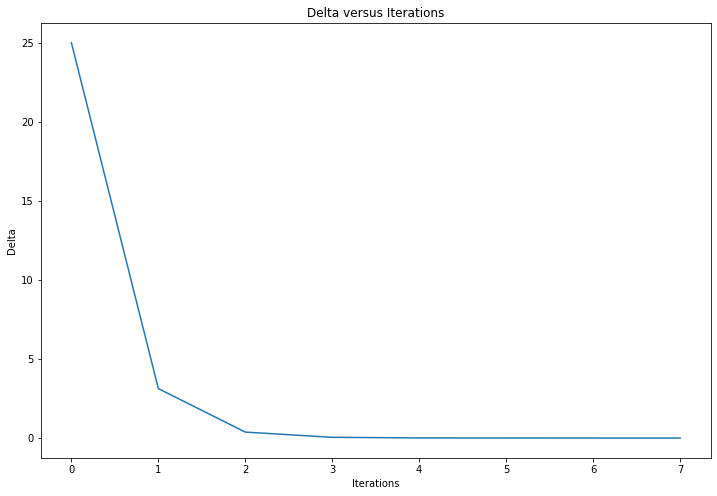

In [49]:
cache = env.value_iteration()
policy = env.get_policy()

In [50]:
env.state_values

array([0.00000000e+00, 1.22070312e-04, 4.88281250e-04, 4.88281250e-04,
       1.95312500e-03, 1.95312500e-03, 1.95312500e-03, 7.81250000e-03,
       7.81250000e-03, 7.81250000e-03, 7.81250000e-03, 7.81250000e-03,
       7.81250000e-03, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01,
       1.25000000e-01, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01,
       1.25000000e-01, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01,
       1.25000000e-01, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01,
       1.25000000e-01, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01,
       1.25000000e-01, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01,
       1.25000000e-01, 1.25000000e-01, 5.00000000e-01, 5.00000000e-01,
       5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
      

In [51]:
print(policy)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
